In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

style.use('seaborn-darkgrid')

In [0]:
data = pd.read_csv("/content/drive/My Drive/ColabDataset/diamonds.csv")

In [3]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
data.shape

(53940, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [0]:
# we see there is no null value in any columns

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [0]:
# carat is seems to be quite skewed and price too

In [9]:
data.describe(include='O')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [0]:
size=(19,9)

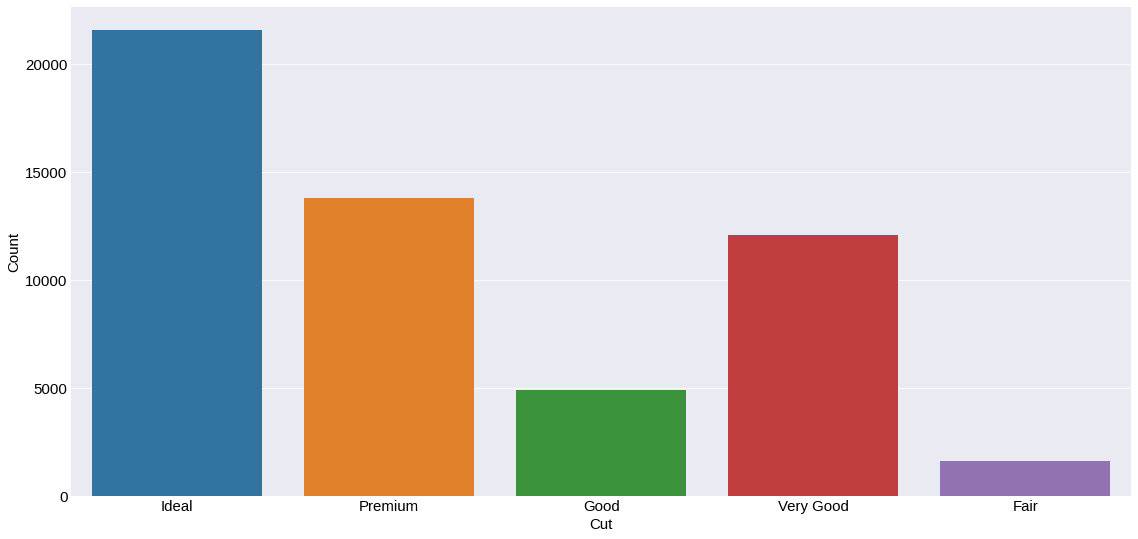

In [11]:
plt.figure(figsize=size)

sns.countplot(data['cut'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Cut',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

plt.show()

In [0]:
# it seem to be higly un-blanced for cut

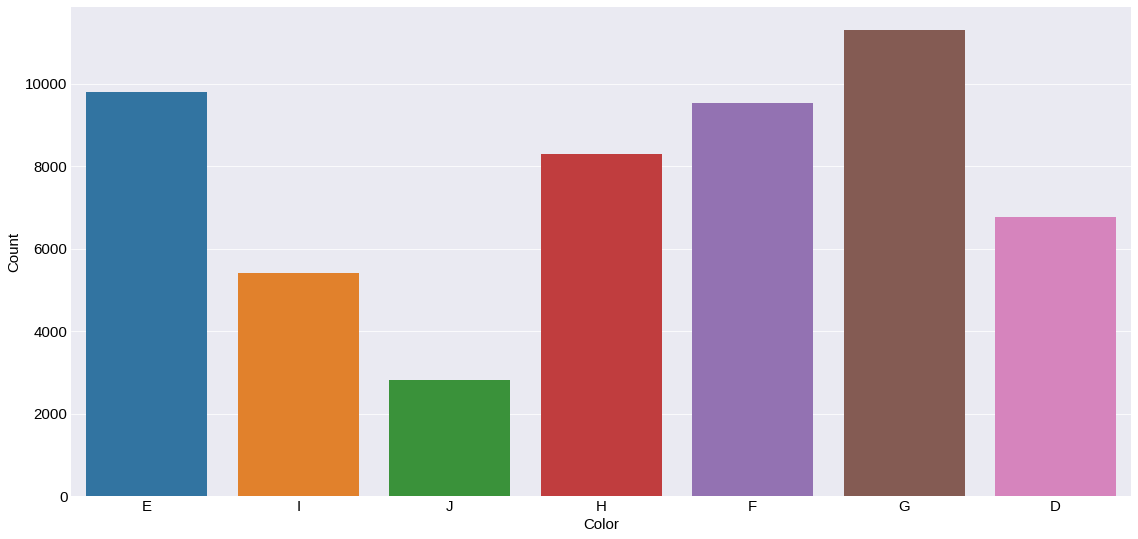

In [13]:
plt.figure(figsize=size)

sns.countplot(data['color'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Color',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

plt.show()

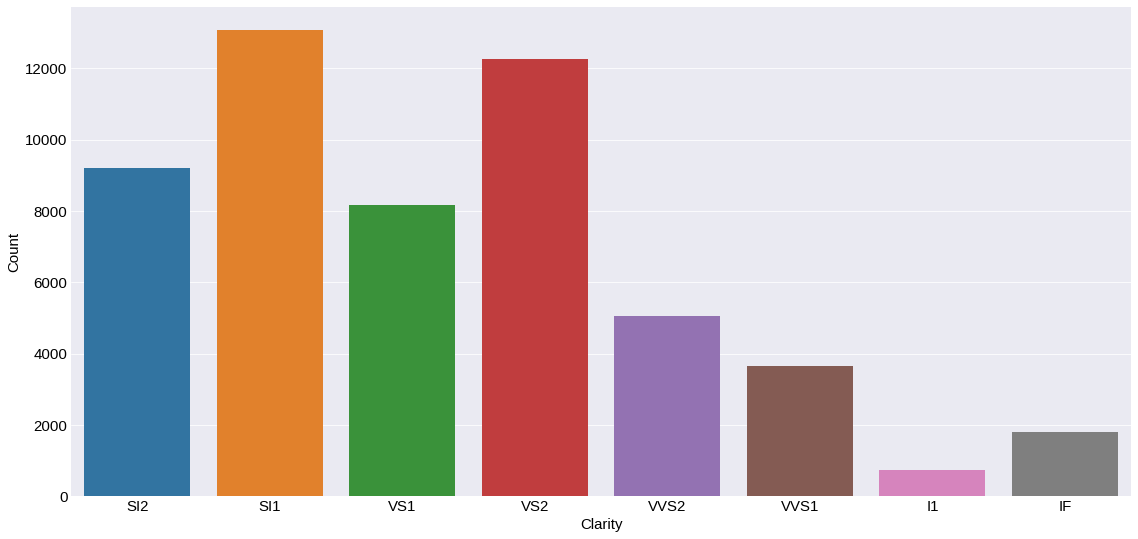

In [14]:
plt.figure(figsize=size)

sns.countplot(data['clarity'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Clarity',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

plt.show()

In [0]:
# few of clarity value is not having much count in the column

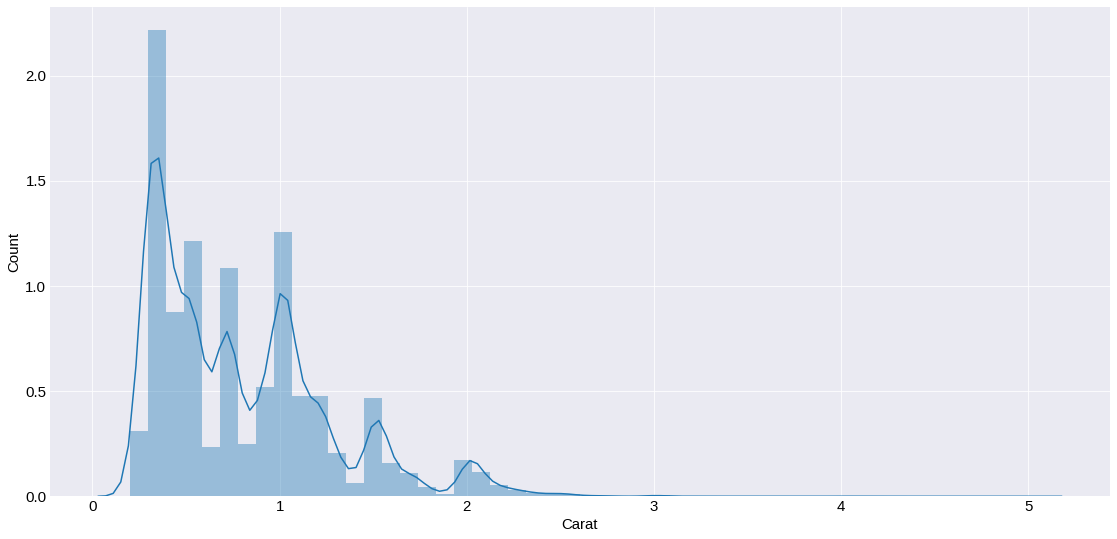

In [16]:
plt.figure(figsize=size)

sns.distplot(data['carat'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Carat',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

plt.show()

In [0]:
# it seems to be positive skewed with much outliers in columns

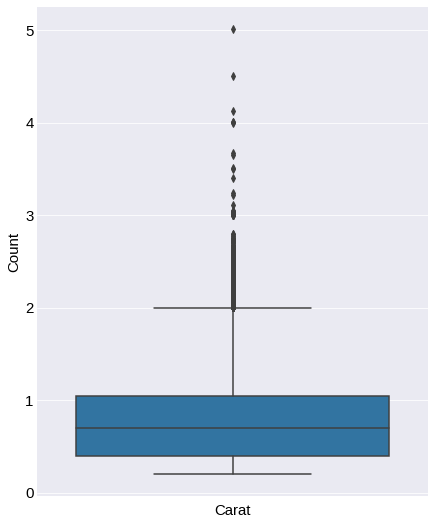

In [18]:
plt.figure(figsize=(7,9))

sns.boxplot(data['carat'],orient='v')

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Carat',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

plt.show()

In [19]:
(data['carat']>2).sum()

1889

In [20]:
((data['carat']>2).sum()/len(data))*100

3.5020393029291808

In [0]:
# where 96.5 of data are within the range of 2 and other seems to be outliers 
# so we will drop the outliers and fill with mean value

In [22]:
data['carat'].median()

0.7

In [0]:

def replacement(x):
  if(x['carat']>2):
    return 0.7
  else:
    return x['carat']

data['carat'] = data.apply(replacement,1)

In [24]:
(data['carat']>2).sum()

0

In [25]:
len(data['carat']) == len(data)

True

In [26]:
data['carat'].values

array([0.23, 0.21, 0.23, ..., 0.7 , 0.86, 0.75])

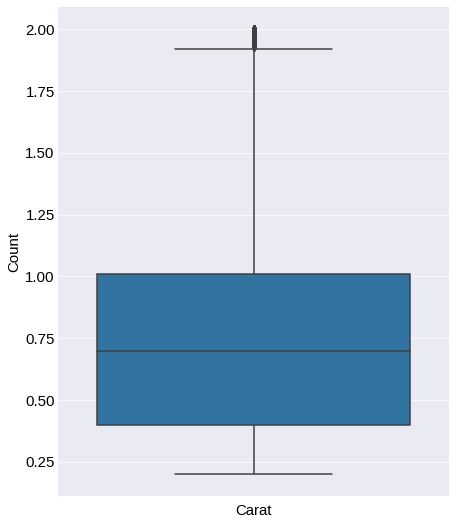

In [27]:
plt.figure(figsize=(7,9))

sns.boxplot(data['carat'],orient='v')

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Carat',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

plt.show()

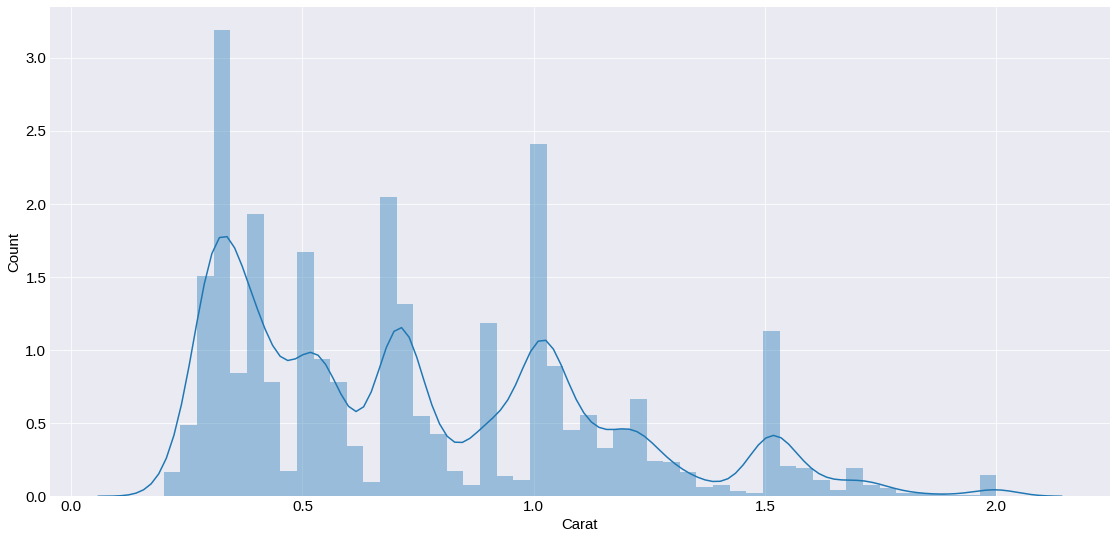

In [28]:
plt.figure(figsize=size)

sns.distplot(data['carat'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Carat',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

plt.show()

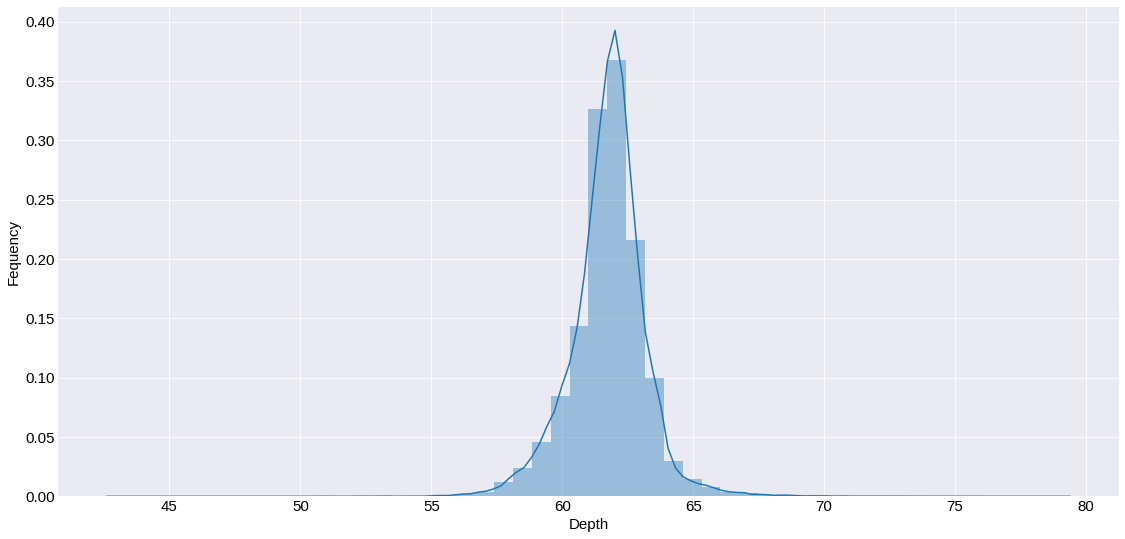

In [29]:
plt.figure(figsize=size)

sns.distplot(data['depth'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Depth',fontsize=15,color='black')
plt.ylabel('Fequency',fontsize=15,color='black')

plt.show()

In [0]:
# depth column is normally distributed 

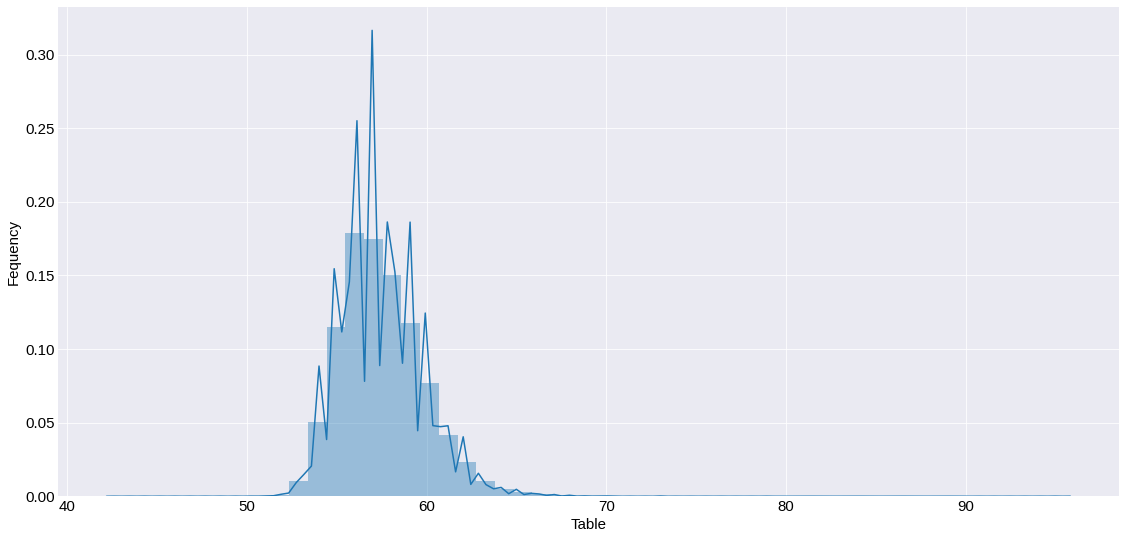

In [31]:
plt.figure(figsize=size)

sns.distplot(data['table'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Table',fontsize=15,color='black')
plt.ylabel('Fequency',fontsize=15,color='black')

plt.show()

In [0]:
# it seem to little positive skewed
# but we can afford this amount of skewness

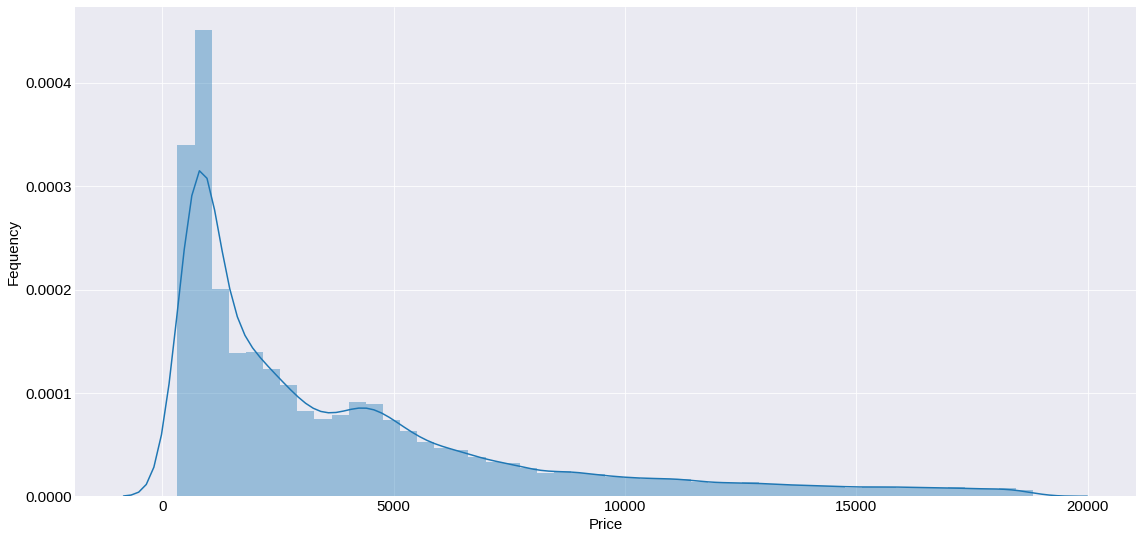

In [33]:
plt.figure(figsize=size)

sns.distplot(data['price'])

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Price',fontsize=15,color='black')
plt.ylabel('Fequency',fontsize=15,color='black')

plt.show()

In [0]:
# we can alter this column
# because it is dependent col

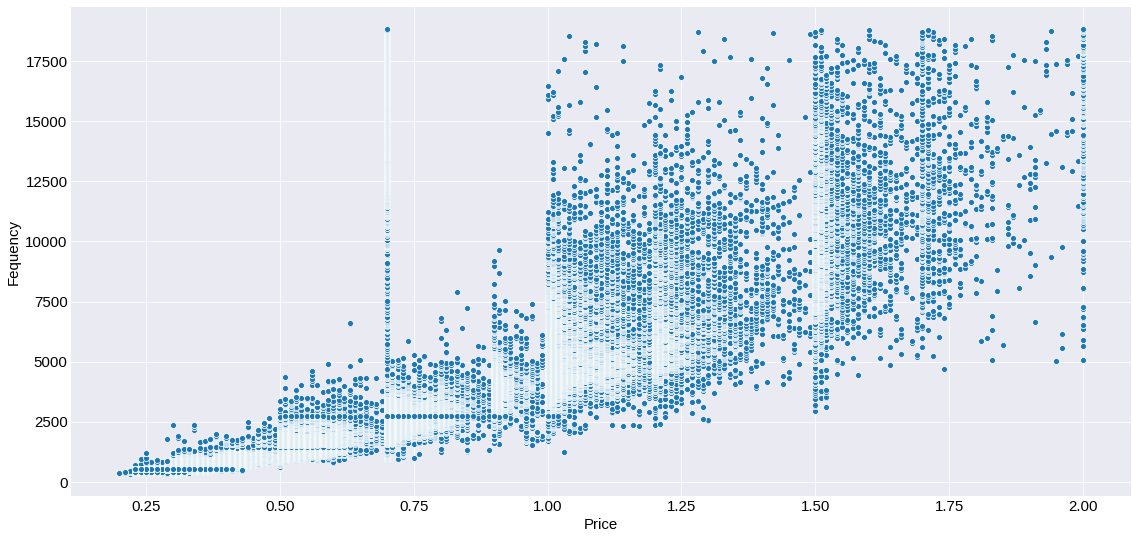

In [35]:
plt.figure(figsize=size)

sns.scatterplot(x='carat',y='price',data=data)

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Price',fontsize=15,color='black')
plt.ylabel('Fequency',fontsize=15,color='black')

plt.show()

In [0]:
# we can say higher the carat higher the price

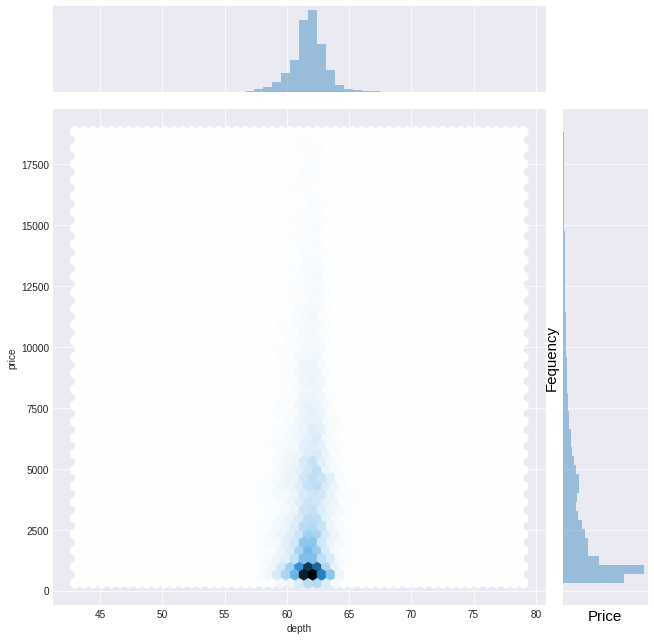

In [37]:
sns.jointplot(x='depth',y='price',data=data,kind='hex',height=9)

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Price',fontsize=15,color='black')
plt.ylabel('Fequency',fontsize=15,color='black')

plt.show()

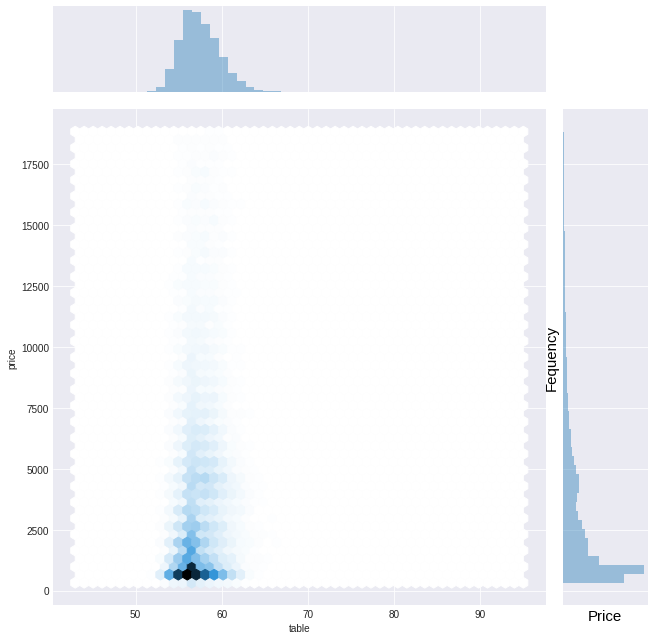

In [38]:
sns.jointplot(x='table',y='price',data=data,kind='hex',height=9)

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')

plt.xlabel('Price',fontsize=15,color='black')
plt.ylabel('Fequency',fontsize=15,color='black')

plt.show()


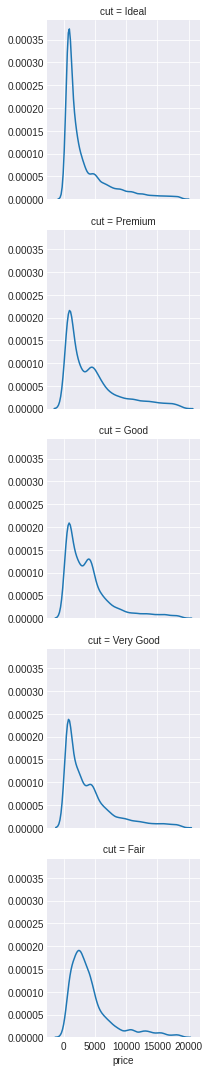

In [39]:
grid = sns.FacetGrid(data=data,row='cut')
grid.map(sns.kdeplot,'price')

plt.show()

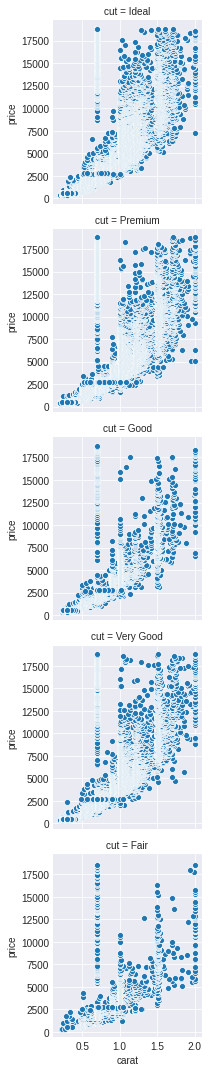

In [40]:
grid = sns.FacetGrid(data=data,row='cut')
grid.map(sns.scatterplot,'carat','price')

plt.show()

In [0]:
# doesn't reach to any conclusion with three column relation

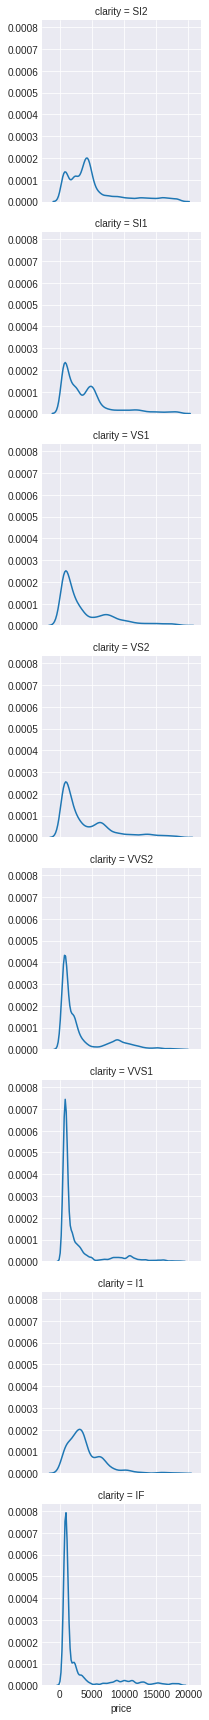

In [42]:
grid = sns.FacetGrid(data=data,row='clarity')
grid.map(sns.kdeplot,'price')

plt.show()

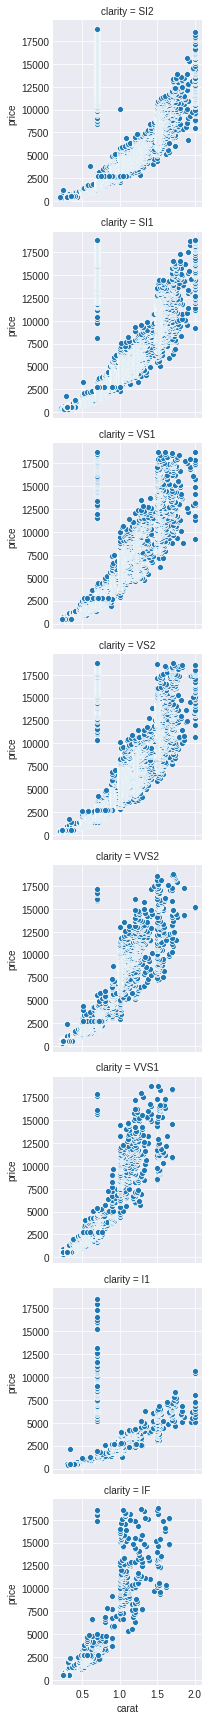

In [43]:
grid = sns.FacetGrid(data=data,row='clarity')
grid.map(sns.scatterplot,'carat','price')

plt.show()

In [0]:
price = data['price']

In [45]:
data.describe(include='O')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [0]:
le = LabelEncoder()

In [0]:
data['cut'] =  le.fit_transform(data['cut'])

In [0]:
data['color'] = le.fit_transform(data['color'])

In [0]:
data['clarity'] = le.fit_transform(data['clarity'])

In [0]:
scaledData = StandardScaler().fit_transform(data.drop('price',1))

In [0]:
data.drop('price',1,inplace=True)

In [0]:
diamond = pd.DataFrame(scaledData,columns=data.columns)

In [0]:
diamond['price'] = price

In [54]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.308639,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,326
1,-1.359261,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,326
2,-1.308639,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,327
3,-1.156775,0.434949,1.414272,0.675442,0.454133,0.242928,-1.364971,-1.317305,-1.287720,334
4,-1.106154,-1.511147,2.002131,-0.484264,1.082358,0.242928,-1.240167,-1.212238,-1.117674,335


In [0]:
xTrain,xTest, yTrain,yTest = train_test_split(diamond.drop('price',1),diamond['price'],test_size=0.2)

In [108]:
xTrain.shape

(43152, 9)

In [109]:
yTrain.shape

(43152,)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

model.add(Dense(9,activation='relu',input_shape=(9,)))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [0]:
call = EarlyStopping(verbose=1,patience=4,monitor='val_loss')

In [114]:
model.fit(xTrain,yTrain,validation_data=(xTest,yTest),callbacks=[call],epochs=200)

Train on 43152 samples, validate on 10788 samples
Epoch 1/200
43152/43152 [==============================] - 2s 44us/step - loss: 31054466.6151 - val_loss: 32662256.2640
Epoch 2/200
43152/43152 [==============================] - 2s 39us/step - loss: 31044018.6465 - val_loss: 32651636.5829
Epoch 3/200
43152/43152 [==============================] - 2s 39us/step - loss: 31033635.7249 - val_loss: 32641018.2195
Epoch 4/200
43152/43152 [==============================] - 2s 39us/step - loss: 31023244.9481 - val_loss: 32630403.6326
Epoch 5/200
43152/43152 [==============================] - 2s 39us/step - loss: 31012873.9247 - val_loss: 32619794.7757
Epoch 6/200
43152/43152 [==============================] - 2s 39us/step - loss: 31002485.4646 - val_loss: 32609173.1728
Epoch 7/200
43152/43152 [==============================] - 2s 39us/step - loss: 30992104.2584 - val_loss: 32598566.3823
Epoch 8/200
43152/43152 [==============================] - 2s 39us/step - loss: 30981727.6559 - val_loss: 3258

In [0]:
his = pd.DataFrame(model.history.history)

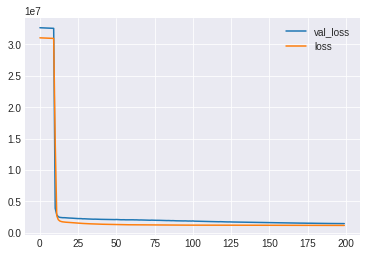

In [116]:
his.plot()

In [0]:
NNPred = model.predict(xTest)

In [118]:
mean_squared_error(yTest,NNPred)

1450212.6897607495

In [119]:
r2_score(yTest,NNPred)

0.9129157564868203

In [0]:
x_train = sm.add_constant(xTrain)

In [0]:
lm = sm.OLS(yTrain,x_train).fit()

In [122]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 2.060e+04
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:01:26   Log-Likelihood:            -3.8280e+05
No. Observations:               43152   AIC:                         7.656e+05
Df Residuals:                   43142   BIC:                         7.657e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3927.0785      8.297    473.325      0.000    3910.817    3943.340
carat       -477.6364     17.468    -27.344      0.000    -511.874    -443.399
cut           98.1906      8.536     11.503      0.000      81.459     114.922
color       -317.6419      8.637    -36.777      0.000    -334.571    -300.713
clarity      545.7691      8.576     63.642      0.000     528.961     562.577
depth         98.3094      9.874      9.957      0.000      78.957     117.662
table       -154.6670      8.964    -17.254      0.000    -172.236    -137.097
x           3435.3042     72.450     47.416      0.000    3293.300    3577.308
y            729.5419     66.483     10.973      0.000     599.233     859.850
z             33.8625     36.177      0.936      0.349     -37.044     104.769
==============================================================================
Omnibus:                    19167.399   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           286427.553
Skew:                           1.746   Prob(JB):                         0.00
Kurtosis:                      15.129   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
reg = LinearRegression()

In [0]:
reg = reg.fit(xTrain,yTrain)

In [125]:
reg.score(xTrain,yTrain)

0.8112088183267468

In [126]:
reg.score(xTest,yTest)

0.8062502966921221

In [0]:
yPred = reg.predict(xTest)

In [0]:
Prediction = pd.DataFrame({'Actual':yTest,'Predicted':yPred.flatten()})

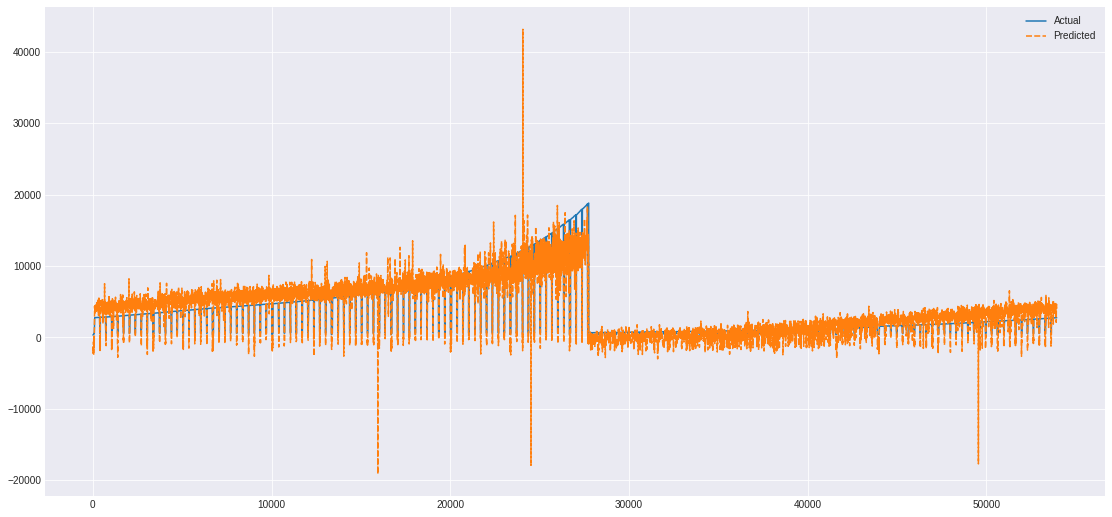

In [129]:
plt.figure(figsize=size)

sns.lineplot(data=Prediction)

plt.show()